In [4]:
# runs a PPP, but with Biomass production against product formation.
# can be read like a pareto front plot
%run create_model.py
import numpy as np
import matplotlib.pyplot as plt

'' is not a valid SBML 'SId'.


In [5]:
#find maximum BM flux without any product flux
model.optimize().objective_value
BM_max = model.optimize().objective_value
print('Value Biomass production (Flux): ', BM_max)

#divide BM_max into 10 parts and iterate over it, setting the lower boundary
#of BM flux to cumulative sum of parts.
#array_biomass = np.arange(0, BM_max, BM_max/10)
array_biomass = np.linspace(0, BM_max, num=10)
array_secretion = []
BM_reaction = Reaction('DRAIN_Biomass')

#array_secretion[0] = 9
#print(array_biomass)
#print(array_secretion)

for i in array_biomass:
    with model:
        model.reactions.DRAIN_Biomass.bounds = i, 1000
        model.objective = model.reactions.ARTA_ex
        solution = model.optimize()    
        array_secretion.append(solution.fluxes.ARTA_ex)
        #print(model.optimize().objective_value)
        print(model.reactions.DRAIN_Biomass.bounds)

print(array_secretion)


Value Biomass production (Flux):  0.9398547241492903
(0.0, 1000.0)
(0.10442830268325448, 1000)
(0.20885660536650896, 1000)
(0.31328490804976344, 1000)
(0.4177132107330179, 1000)
(0.5221415134162724, 1000)
(0.6265698160995269, 1000)
(0.7309981187827814, 1000)
(0.8354264214660359, 1000)
(0.9398547241492903, 1000)
[2.8081343943413213, 2.496119461636569, 2.1841045289320986, 1.8720895962274966, 1.560074663522904, 1.2480597308182906, 0.9360447981136794, 0.6240298654090796, 0.31201493270447994, -1.3109831825395533e-13]


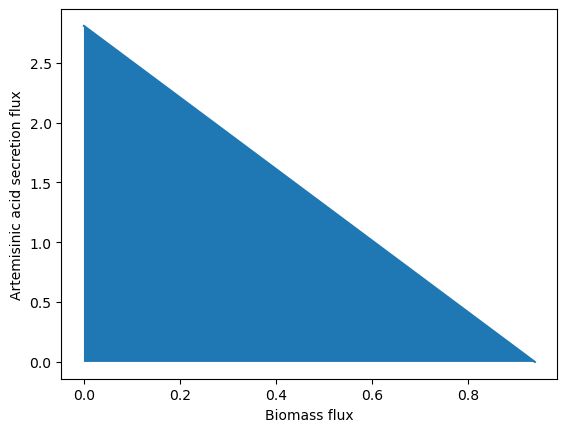

In [6]:
fig = plt.plot(array_biomass, array_secretion,)

plt.xlabel('Biomass flux')            
plt.ylabel('Artemisinic acid secretion flux')
plt.fill_between(array_biomass, array_secretion)